#강아지 품종 분류 모델링
1. 허권: 코커스파니엘, 푸들
2. 종헌: 그레이하운드, 말티즈
3. 보영: 퍼그, 비숑
4. 영옥: 진도개, 삽살개, 시베리안허스키, 말라뮤트, 닥스훈트
5. 현나: 코기, 포메, 리트리버

##selenium으로 image crawling - 리트리버, 포메라니안, 웰시코기
google, naver

In [ ]:
!pip install selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import urllib.request
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def crawling_google(dog):
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')        # Head-less 설정
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome('chromedriver', options=options)
  driver.get("https://www.google.co.kr/imghp?hl=ko&tab=wi&authuser=0&ogbl")
  elem = driver.find_element_by_name("q")
  name = dog  # 검색할 검색어 입력
  elem.send_keys(name)
  elem.send_keys(Keys.RETURN)

  SCROLL_PAUSE_TIME = 2
  # Get scroll height
  last_height = driver.execute_script("return document.body.scrollHeight")
  while True:
      # Scroll down to bottom
      driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
      # Wait to load page
      time.sleep(SCROLL_PAUSE_TIME)
      # Calculate new scroll height and compare with last scroll heigaht
      new_height = driver.execute_script("return document.body.scrollHeight")
      if new_height == last_height:
          try:
              driver.find_element_by_css_selector(".mye4qd").click()
          except:
              break
      last_height = new_height

  images = driver.find_elements_by_css_selector(".rg_i.Q4LuWd")
  count = 1
  for image in images:
    try:
      image.click()
      imgUrl = driver.find_element_by_xpath('/html/body/div[3]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[3]/div/a/img').get_attribute("src")
      opener=urllib.request.build_opener()
      opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36')] # PC의 User-Agent값 입력
      urllib.request.install_opener(opener)
      urllib.request.urlretrieve(imgUrl, f"/content/drive/MyDrive/KDT/offline/mini_project3-image/{dog}/google"+str(count) + ".jpg") # name 이름 폴더 생성후 해당 폴더에 이미지 저장
      count = count + 1
    except:
      pass

  driver.close()

def crawling_naver(dog):
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')  # Head-less 설정
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome('chromedriver', options=options) #chrome driver 설치한 경로 작성
  driver.get("https://search.naver.com/search.naver?where=image&sm=tab_jum") #구글 이미지 검색 url
  element = WebDriverWait(driver, 5)  #켜질때의 대기시간
  #암묵적 대기 -> webdriverwait : 켜질때까지 기다리고 parsing해야해서 이런처리하는것

  elem = driver.find_element_by_name("query") #구글검색창 선택
  name = dog # 검색할 검색어 입력
  elem.send_keys(name) #검색창에 검색할 내용 넣기
  elem.send_keys(Keys.RETURN) #검색할 내용 넣고 enter 치는것


  SCROLL_PAUSE_TIME = 2 #scroll 내려가는 시간
  # Get scroll height
  last_height = driver.execute_script("return document.body.scrollHeight") #browser의 높이를 javascript로 찾음


  while True:
      # Scroll down to bottom
      driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") #browser 끝까지 scroll 내림
      # Wait to load page
      time.sleep(SCROLL_PAUSE_TIME)
      # Calculate new scroll height and compare with last scroll height
      new_height = driver.execute_script("return document.body.scrollHeight")
      if new_height == last_height:
          try:
              driver.find_element_by_css_selector(".mye4qd").click() #'결과 더보기'가 뜨는 경우 이를 클릭해라
          except:
              break
      last_height = new_height

  images = driver.find_elements_by_css_selector("._image._listImage")
  count = 1
  for image in images:
      image.click()
      imgUrl = driver.find_element_by_xpath("/html/body/div[3]/div[2]/div/div[1]/section[2]/div/div[2]/div/div/div[1]/div[1]/div/div/div[1]/div[1]/img").get_attribute("src")
      opener=urllib.request.build_opener()
      opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36')] # PC의 User-Agent값 입력
      urllib.request.install_opener(opener)
      urllib.request.urlretrieve(imgUrl, f"/content/drive/MyDrive/KDT/offline/mini_project3-image/dog/{dog}/naver"+str(count) + ".jpg") # name 이름 폴더 생성후 해당 폴더에 이미지 저장
      count = count + 1

  driver.close()

In [ ]:
crawling_google('웰시코기')
crawling_naver('웰시코기')

crawling_google('포메라니안')
crawling_naver('포메라니안')

crawling_google('리트리버')
crawling_naver('리트리버')

## Preprocessing
#### resize, zero-centering, gray scale
#### crawling한 데이터들 pickle로 만들기 

In [ ]:
import os  #경로 control시 사용하는 library
import cv2 #image처리시 사용하는 library

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from tqdm.notebook import tqdm

import tensorflow as tf

import pickle

from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/KDT/offline/mini_project3-image/dog'

In [ ]:
data_path = '/content/drive/MyDrive/KDT/offline/mini_project3-image/dog'
os.listdir(data_path) #해당 path에 들어있는 폴더 목록 보여줌

['웰시코기', '리트리버', '포메라니안']

In [ ]:
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(data_path):
    sub_path = '/content/drive/MyDrive/KDT/offline/mini project3-image/dog/'+label+'/'
    dataset[label] = [] #빈 dict에 key값으로 label을 넣었음
    for filename in os.listdir(sub_path): #dataset에서 cat에 들어있는 하위 목록들(cat 사진 파일명)
        dataset[label].append(sub_path+filename)
#각 label에 해당하는 사진 경로들을 넣었음


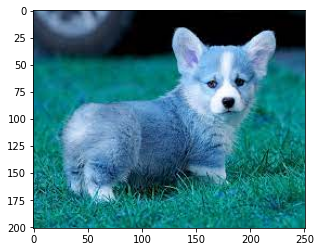

In [ ]:
plt.imshow(cv2.imread('/content/drive/MyDrive/KDT/offline/mini_project3-image/dog/웰시코기/google1.jpg'))

In [ ]:
label_texts = os.listdir('/content/drive/MyDrive/KDT/offline/mini_project3-image/dog')

In [ ]:
x_datasets, y_datasets = [], []

label_index = {label_texts[0] : 13, 
               label_texts[1] : 12,
               label_texts[2] : 14}


for label, filenames in tqdm(zip(dataset.keys(), dataset.values())):
  for filename in tqdm(filenames):
    # img를 array 형태로 변경
    image = cv2.imread(filename) #사진을 읽어들여 array형태로 저장
    resize = lambda x: tf.image.resize(x, (224, 224)) #크롤링하다보니 사이즈들이 다르다. 그러므로 resize해줌
    image = resize(image)
    x_datasets.append(image) #위의 빈 list에 넣어줌
    # label을 index로 변경
    y_datasets.append(label_index[label])


x_datasets = np.array(x_datasets) #shape → (3708, 224, 224, 3)
y_datasets = np.array(y_datasets) #shape → (3708,)

In [ ]:
def preprocess(image, grayscale=False):
    # zero-centering
    image -= np.mean(image, axis=0) #image에 대해서 channe단위로 평균값을 내서  평균값을 빼줌
    
    # grayscale
    if grayscale:
        image = tf.image.rgb_to_grayscale(image)
    return np.array(image)

In [ ]:
def zero_mean(image):
    # zero-centering
    return np.mean(image, axis=0) #image에 대해서 channe단위로 평균값을 내서  평균값을 빼줌


In [ ]:
img_mean = zero_mean(train_img)
train_img -= img_mean
test_img -= img_mean

In [ ]:
x_datasets = preprocess(x_datasets, grayscale=True)

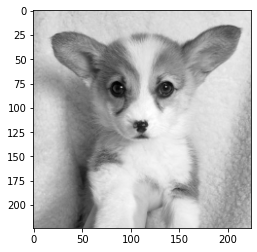

In [ ]:
plt.imshow(x_datasets[0][:,:,0], cmap='gray')
plt.show()

In [ ]:
# 전처리한 파일 저장
with open('x_dataset.pickle', 'wb') as f:
    pickle.dump(x_datasets, f)

with open('y_dataset.pickle', 'wb') as f:
    pickle.dump(y_datasets, f)

##조원들이 만들어온 pickle data 병합

In [ ]:
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/코카,푸들(이미지).pickle','rb') as f:
  co_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/코카,푸들(라벨).pickle','rb') as f:
  co_label = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/말티즈,그레이하운드(이미지).pickle','rb') as f:
  mal_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/말티즈,그레이하운드(라벨).pickle','rb') as f:
  mal_label = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/퍼그,비숑(이미지).pickle','rb') as f:
  pug_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/퍼그,비송(라벨).pickle','rb') as f:
  pug_label = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/이미지데이터.pickle','rb') as f:
  img_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/라벨데이터.pickle','rb') as f:
  label_label = pickle.load(f)

with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/코기,인절미,포메(이미지).pickle','rb') as f:
  cogi_data = pickle.load(f)
with open('/content/drive/MyDrive/Colab Notebooks/국비지원수업(K-digital)/프로젝트/강아지품종예측(이미지 인식 프로젝트)/전처리(완료)/코기,인절미,포메(라벨).pickle','rb') as f:
  cogi_label = pickle.load(f)

In [ ]:
data = np.concatenate([co_data,mal_data,pug_data,img_data,cogi_data])
label = np.concatenate([co_label,mal_label,pug_label,label_label,cogi_label])

In [ ]:
data = tf.repeat(data,3,axis=3)
data.shape

TensorShape([11289, 224, 224, 3])

In [ ]:
import pickle
with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)
with open('label.pickle', 'wb') as f:
    pickle.dump(label, f)

In [ ]:
data = np.concatenate([co_data,mal_data,pug_data,img_data,cogi_data]) #numpy 배열 합치기
label = np.concatenate([co_label,mal_label,pug_label,label_label,cogi_label])
label = np.concatenate([co_label])
data = tf.repeat(data,3,axis=3)
with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)
with open('label.pickle', 'wb') as f:
    pickle.dump(label, f)